In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
x = np.linspace(0, 499, 500)
y = np.sin(x * 2 * np.pi / 50)

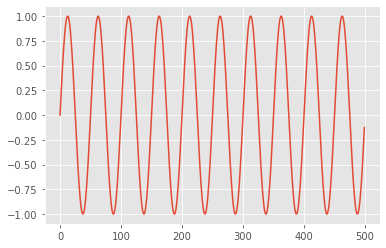

In [ ]:
plt.plot(x, y)

In [ ]:
def make_sequence_data(y, num_sequence):
    num_data = len(y)
    seq_data = []
    target_data = []
    for i in range(num_data - num_sequence):
        seq_data.append(y[i:i+num_sequence])
        target_data.append(y[i+num_sequence:i+num_sequence+1])
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)
    return seq_arr, target_arr

In [ ]:
seq_length = 40
y_seq, y_target = make_sequence_data(y, seq_length)

In [ ]:
y_seq.shape

(460, 40)

In [ ]:
y_target.shape

(460, 1)

In [ ]:
num_test = 10
y_seq_train = y_seq[:-num_test]
y_seq_test = y_seq[-num_test:]
y_target_train = y_target[:-num_test]
y_target_test = y_target[-num_test:]

In [ ]:
y_seq_train

array([[ 0.00000000e+00,  1.25333234e-01,  2.48689887e-01, ...,
        -9.98026728e-01, -9.98026728e-01, -9.82287251e-01],
       [ 1.25333234e-01,  2.48689887e-01,  3.68124553e-01, ...,
        -9.98026728e-01, -9.82287251e-01, -9.51056516e-01],
       [ 2.48689887e-01,  3.68124553e-01,  4.81753674e-01, ...,
        -9.82287251e-01, -9.51056516e-01, -9.04827052e-01],
       ...,
       [-3.68124553e-01, -2.48689887e-01, -1.25333234e-01, ...,
        -9.04827052e-01, -9.51056516e-01, -9.82287251e-01],
       [-2.48689887e-01, -1.25333234e-01, -2.20436424e-15, ...,
        -9.51056516e-01, -9.82287251e-01, -9.98026728e-01],
       [-1.25333234e-01, -2.20436424e-15,  1.25333234e-01, ...,
        -9.82287251e-01, -9.98026728e-01, -9.98026728e-01]])

In [ ]:
y_seq_train.shape

(450, 40)

In [ ]:
y_seq_t = torch.FloatTensor(y_seq_train)
y_target_t = torch.FloatTensor(y_target_train)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=1, hidden_size=self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x_last = x[-1]
        x = self.linear(x_last)
        return x

In [ ]:
model = LSTM(100)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
y_seq_t.size()

torch.Size([450, 40])

In [ ]:
y_seq_t = y_seq_t.permute(1, 0)
y_target_t = y_target_t.permute(1, 0)

In [ ]:
y_seq_t.size()

torch.Size([40, 450])

In [ ]:
y_seq_t = y_seq_t.unsqueeze(dim=-1)
y_target_t = y_target_t.unsqueeze(dim=-1)

In [ ]:
y_seq_t.size()

torch.Size([40, 450, 1])

In [ ]:
num_epochs = 80
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(y_seq_t)
    loss = criterion(output, y_target_t)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1, 450, 1])) that is different to the input size (torch.Size([450, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0, loss: 0.5093941688537598
epoch: 10, loss: 0.4036681354045868
epoch: 20, loss: 0.25430575013160706
epoch: 30, loss: 0.08256971091032028
epoch: 40, loss: 0.009677250869572163
epoch: 50, loss: 0.004739707801491022
epoch: 60, loss: 0.001487448695115745
epoch: 70, loss: 0.0007603259873576462


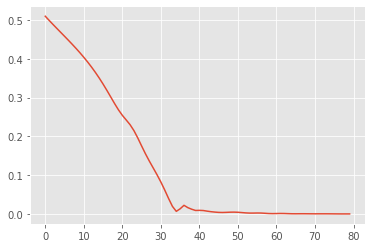

In [ ]:
plt.plot(losses)

In [ ]:
y_seq_test_t = torch.FloatTensor(y_seq_test)
y_seq_test_t = y_seq_test_t.permute(1, 0)
y_seq_test_t = y_seq_test_t.unsqueeze(dim=-1)

In [ ]:
y_seq_test_t.size()

torch.Size([40, 10, 1])

In [ ]:
y_pred = model(y_seq_test_t)

In [ ]:
y_pred.size()

torch.Size([10, 1])

(450.0, 500.0)

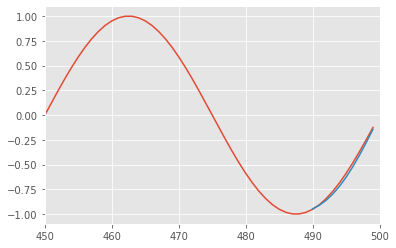

In [ ]:
plt.plot(x, y)
plt.plot(np.arange(490, 500), y_pred.detach())
plt.xlim([450, 500])